In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/carprices.csv')
df.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


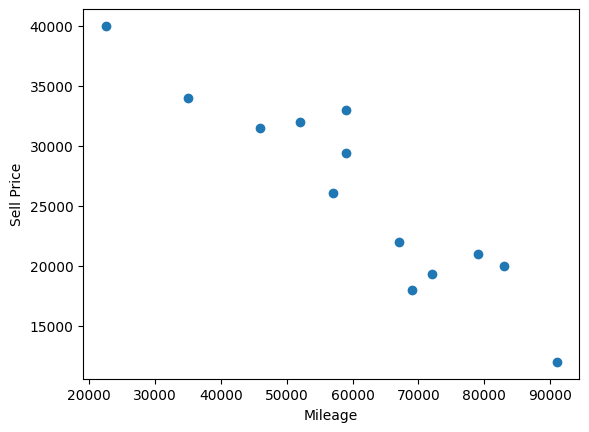

In [ ]:
plt.scatter(df['Mileage'],df['Sell Price($)'])
plt.xlabel('Mileage')
plt.ylabel('Sell Price')
plt.show()

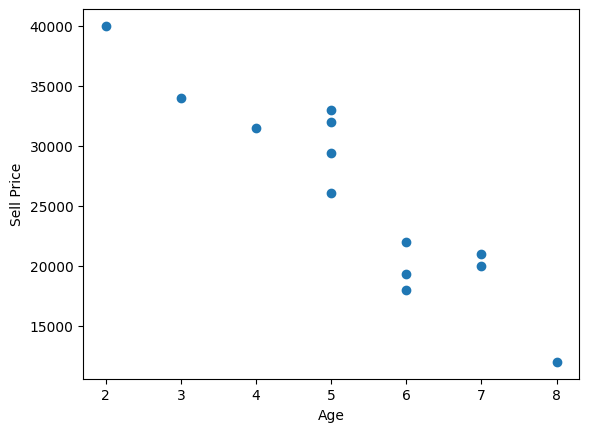

In [ ]:
plt.scatter(df['Age(yrs)'],df['Sell Price($)'])
plt.xlabel('Age')
plt.ylabel('Sell Price')
plt.show()

Text(0, 0.5, 'Age')

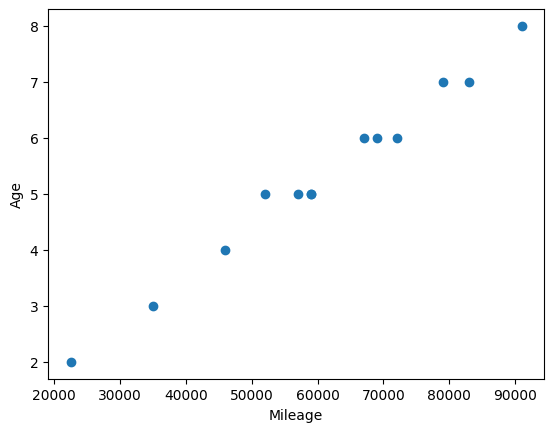

In [ ]:
plt.scatter(df['Mileage'],df['Age(yrs)'])
plt.xlabel('Mileage')
plt.ylabel('Age')

In [ ]:
dummies=pd.get_dummies(df['Car Model'])
dummies.head(2)

,Audi A5,BMW X5,Mercedez Benz C class
0,False,True,False
1,False,True,False


In [ ]:
merged=pd.concat([df,dummies],axis='columns')
merged.head(2)

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,False,True,False
1,BMW X5,35000,34000,3,False,True,False


In [ ]:
final=merged.drop(['Car Model'],axis='columns')
final.head(2)

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,69000,18000,6,False,True,False
1,35000,34000,3,False,True,False


In [ ]:
final.isnull().sum()

,0
Mileage,0
Sell Price($),0
Age(yrs),0
Audi A5,0
BMW X5,0
Mercedez Benz C class,0


In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(final[['Mileage','Age(yrs)','Audi A5','BMW X5','Mercedez Benz C class']], final['Sell Price($)'])

LinearRegression()

In [ ]:
x=final.drop(['Sell Price($)'],axis='columns')
y=final['Sell Price($)']

In [ ]:
y_pred=model.predict(x)

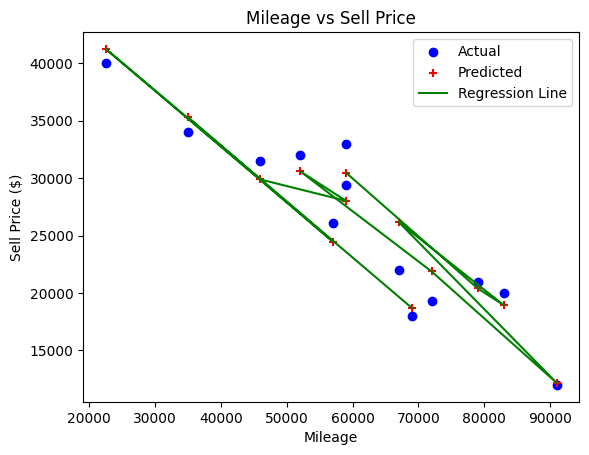

In [ ]:
plt.scatter(x['Mileage'], y, color='blue', label='Actual')
plt.scatter(x['Mileage'], y_pred, color='red', marker='+', label='Predicted')
plt.xlabel('Mileage')
plt.ylabel('Sell Price ($)')
plt.title('Mileage vs Sell Price')
plt.plot(x['Mileage'], y_pred, color='green', label='Regression Line')
plt.legend()
plt.show()

In [ ]:
model.fit(final[['Mileage','Age(yrs)','Audi A5','BMW X5','Mercedez Benz C class']],final['Sell Price($)'])

LinearRegression()

to predict price of a benz that is 4 years old with mileage 45000

In [ ]:
model.predict(pd.DataFrame([[45000, 4, 0, 0, 1]], columns=['Mileage', 'Age(yrs)', 'Audi A5', 'BMW X5', 'Mercedez Benz C class']))

array([36991.31721061])

to predict price of a bmwx5 that is 7 years old with mileage 86000

In [ ]:
model.predict([[86000,7,0,1,0]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])

In [ ]:
model.predict(pd.DataFrame([[86000, 7, 0, 1, 0]], columns=['Mileage', 'Age(yrs)', 'Audi A5', 'BMW X5', 'Mercedez Benz C class']))

array([11080.74313219])

Accuracy of the model


In [ ]:
model.score(final[['Mileage','Age(yrs)','Audi A5','BMW X5','Mercedez Benz C class']], final['Sell Price($)'])

0.9417050937281083